# K-Means Clustering



In [1]:
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [7, 5]
%matplotlib inline

In this exercise, we will use the [K-means clustering](https://www.kaggle.com/code/shrutimechlearn/step-by-step-kmeans-explained-in-detail) algorithm to group data points into clusters.

# The Data
For this exercise, we will use generated data.

Since we generate the data, we know the number of clusters,
but in real life, we don't know the number of clusters and we usually don't know the labels.

Text(0, 0.5, 'x2')

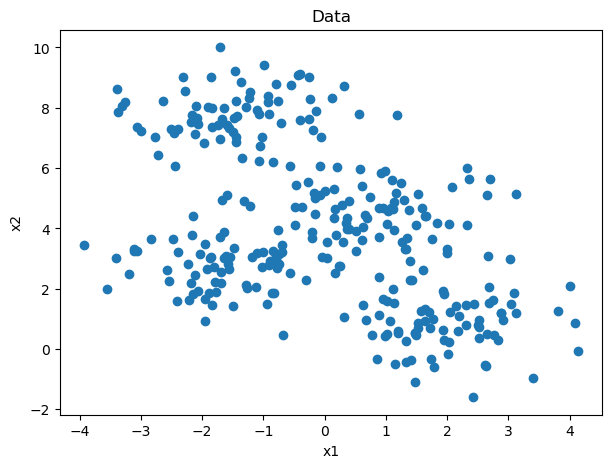

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=52843%9,
                       cluster_std=0.9, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')

# Using the kMeans algorithm
1. Use [sklearn kMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to segment the data into 2 clusters.
1. Make a [scatterplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) of the data with the color of the datapoints representing the different clusters.
1. Plot the [cluster centers](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#:~:text=Attributes%3A-,cluster_centers_,-ndarray%20of%20shape)
1. Calculate [inertia](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#:~:text=of%20each%20point-,inertia_,-float) (aka WCSS) 
1. Calculate [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Inertia for k=2: 1429.3077585140031
Silhouette score for k=2: 0.4660535903118591


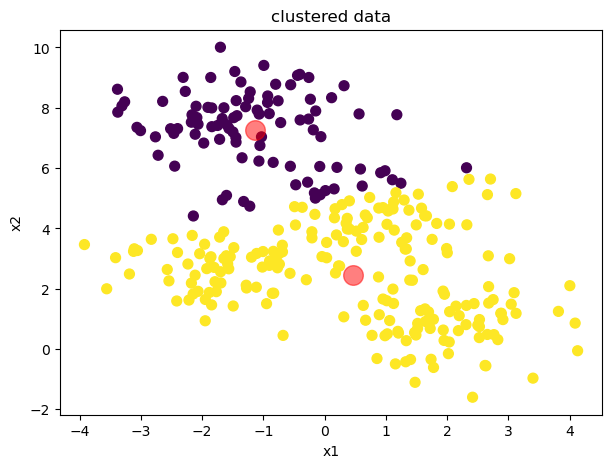

In [12]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, 
                random_state=0,
                n_init=10)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('clustered data')
plt.xlabel('x1')
plt.ylabel('x2')

print(f'Inertia for k=2: {kmeans.inertia_}')
print(f'Silhouette score for k=2: {silhouette_score(X, y_kmeans)}')

###

# Choosing the right number of clusters 
To find the appropriate number of clusters, use the k-means algorithm for different numbers of clusters. 
1. plot the inertias against the number of clusters used. (This should result in a so-called elbow curve)
1. Plot the Silhouette scores against the number of clusters.
1. Use the 2 plots to find an optimal value of k.   


See [here](https://www.kaggle.com/code/shrutimechlearn/step-by-step-kmeans-explained-in-detail#4.-Choosing-the-right-K) for an explanation of the elbow method.



c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

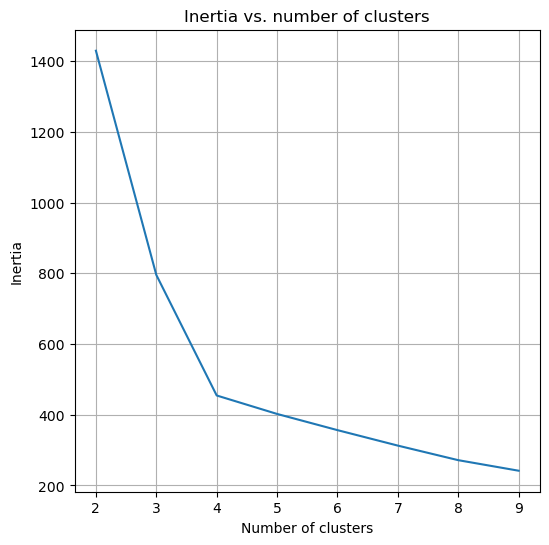

In [14]:
### EXAMPLE SOLUTION
from sklearn.metrics import silhouette_score
k_list = [k for k in range(2, 10)]
inertia = []
silhouette = []

for k in k_list:
    kmeans = KMeans(n_clusters=k, 
                    random_state=0,
                    n_init=10)
    kmeans.fit(X)
    y_kmeans = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, y_kmeans))

# Plot the inertia
plt.figure(figsize=(6, 6))
plt.grid()
plt.plot(k_list, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. number of clusters')
plt.show()

###

> If we analyze the graph, we can see that the graph changes rapidly at one point, creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters. Let us see if the silhouette plot also justifies this observation -- how can we choose between k=3 and k=4?

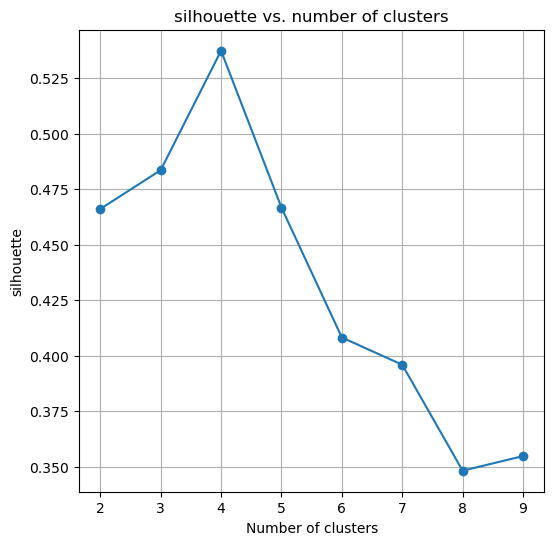

In [15]:

plt.figure(figsize=(6, 6))
plt.grid()
plt.plot(k_list, silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.title('silhouette vs. number of clusters')
plt.show()


> When we analyze the silhouette plot, the silhouette score peaks at k=4. Therefore, the choice of k=4 is appropriate.

# Cluster Means Initialization
For number of clusters = 4, provide custom initializations of cluster centers. Check the documentation of sklearn to see how to do this. 
[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)   
1. Generate 10 different [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) initial cluster centers. (Hint: for k=4, `center.shape -> (4,2)`)
1. For each center, fit the kMeans algorithm.
1. Keep track of the number of iterations required until the algorithm converges. (Hint: `kmeans.n_iter_`)
1. Plot the number of iterations required. How does the choice of initial cluster centers affect the algorithm?

c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

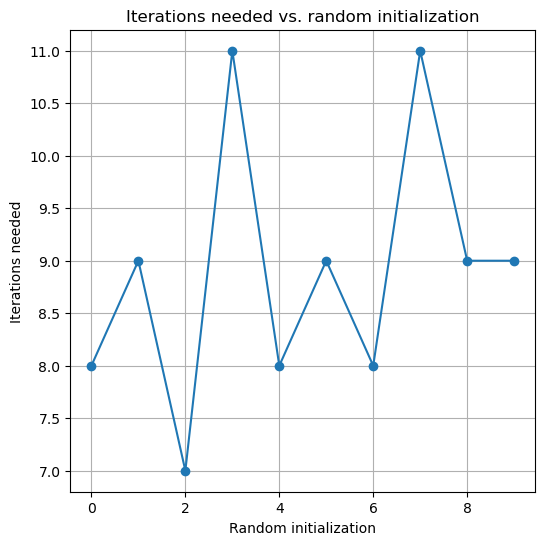

In [16]:
### EXAMPLE SOLUTION

centers = [np.random.rand(4, 2) for n in range(10)]
iterations_needed = []

for center in centers:
    kmeans = KMeans(n_clusters=4, init=center,n_init=1, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    iterations_needed.append(kmeans.n_iter_)

plt.figure(figsize=(6, 6))
plt.grid()
plt.plot(iterations_needed, marker='o')
plt.xlabel('Random initialization')
plt.ylabel('Iterations needed')
plt.title('Iterations needed vs. random initialization')
plt.show()
    
###

> We see that the choice of the initial cluster centers has quite a large impact on the convergence speed.

# Initial Cluster Centers
By default, Sklearn's kmeans intelligently selects the initial cluster centers for k-means clustering ([K-means++](https://www.geeksforgeeks.org/ml-k-means-algorithm/)) to speed up convergence. 

1. Repeat Exercise 1 using k=4 and 'kmeans++' for initialization to see if it really converges faster.

c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Inertia for k=4: 454.3778700005048
Iterations needed: 4


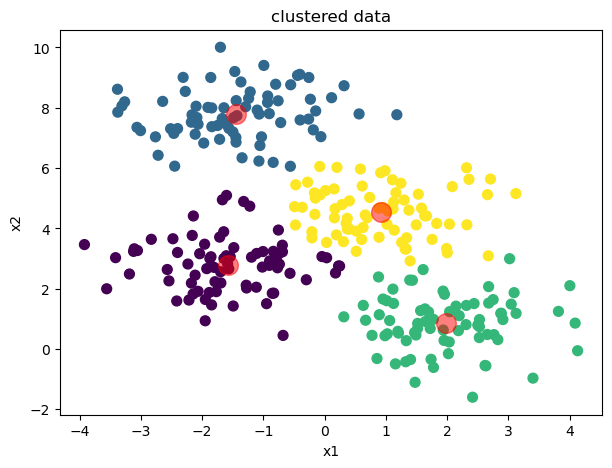

In [17]:
### EXAMPLE SOLUTION

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, 
                init = 'k-means++',
                n_init=10,)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('clustered data')
plt.xlabel('x1')
plt.ylabel('x2')

print(f'Inertia for k=4: {kmeans.inertia_}')
print(f'Iterations needed: {kmeans.n_iter_}')

###

The number of iterations needed for Kmeans to converge with kmeans++ is the lowest.

# Widget
If you want, you can play with this widget and try different numbers of k's and see the result after different iterations.

In [19]:

# you can install ipywidgets with the following command
# %pip install ipywidgets

# note that you may need to restart the kernel after installing ipywidgets
# note that while "%matplotlib widgets" is used, the normal plots may not show up in the notebook
# if the plots do not show up, restart the kernel and run the notebook again
import ipywidgets as widgets

widgetActive = False

if widgetActive:
    %matplotlib widget

    fig, ax = plt.subplots(figsize=(9, 5))
    fig.suptitle('K-Means clustering')

    @widgets.interact(max_iter=(1, 20), n_clusters=(1, 10), init=['random', 'k-means++'])
    def plot_kmeans(n_clusters = 2, max_iter=1, init='random'):
        kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=0, init=init, n_init=1)
        kmeans.fit(X)
        y_kmeans = kmeans.predict(X)
        ax.clear()
        ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
        print(f'Number of iterations: {kmeans.n_iter_}')
        print(f'Inertia: {kmeans.inertia_}')

else:
    %matplotlib inline
